In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
train = pd.read_csv("G:/black friday sale/train_oSwQCTC/train.csv")
test = pd.read_csv("G:/black friday sale/test_HujdGe7/test.csv")

In [121]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [122]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [123]:
## making the copy of train and test data

train_cpy = train.copy()
test_cpy = test.copy()

In [124]:
train.shape

(550068, 12)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [126]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [127]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [128]:
train.Product_ID.nunique()

3631

In [129]:
train.User_ID.nunique()

5891

In [130]:
train_cat = train.select_dtypes(include='object')
## having the cat(object column names)
train_cat.columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [131]:
## dropping the Product_Id
train_cat.drop(['Product_ID'], axis=1, inplace=True)

In [132]:
train_cat.columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

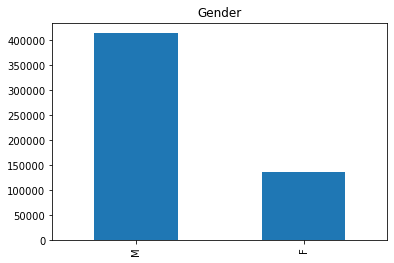

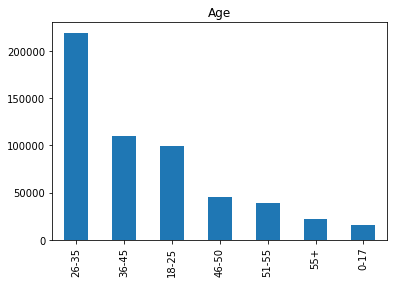

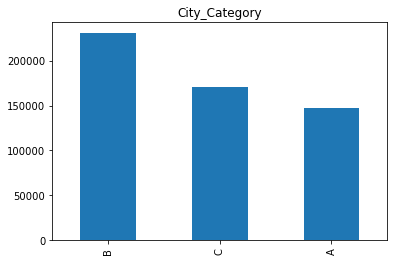

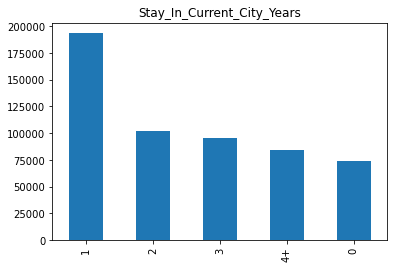

In [133]:
for i in train_cat.columns:
    train[i].value_counts().plot.bar()
    plt.title('{0}'.format(i))
    plt.show()

In [134]:
train_numeric = train.select_dtypes(include=['int64', 'float64'])

## numerical data
train_numeric.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [135]:
## droping the UserID
train_numeric.drop(["User_ID"], axis=1, inplace=True)
train_numeric.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

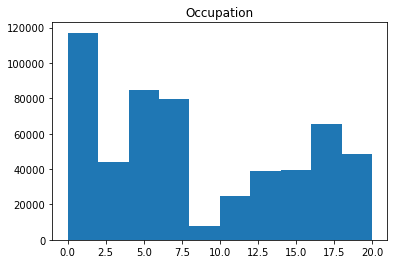

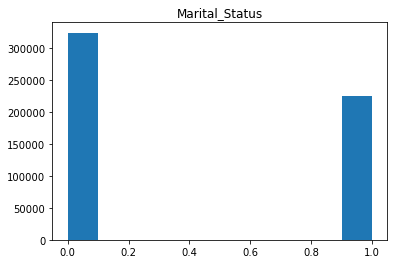

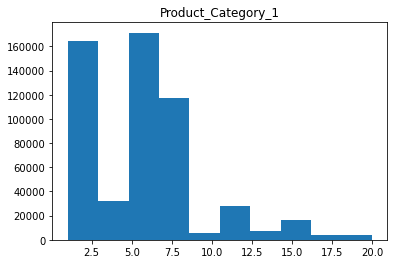

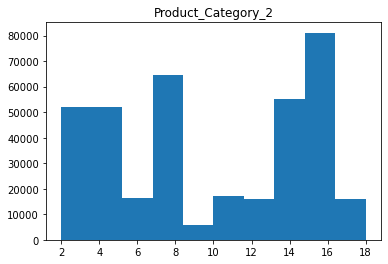

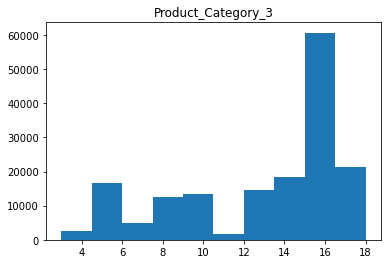

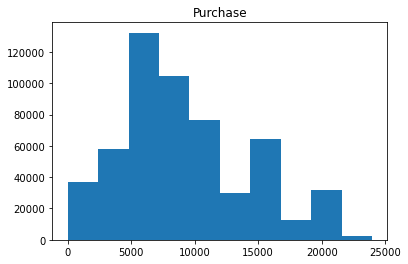

In [136]:
for i in train_numeric.columns:
    plt.hist(train[i])
    plt.title('{0}'.format(i))
    plt.show()

In [137]:
train_numeric.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

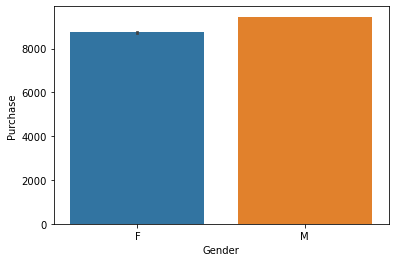

In [138]:
## Bar-plot with default statistics-mean

sns.barplot(x = 'Gender', y = 'Purchase', data=train)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

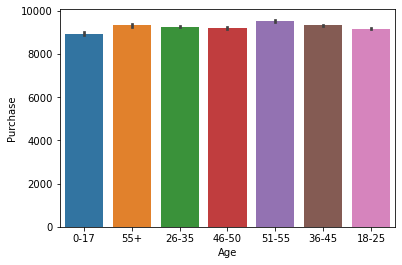

In [139]:
## Bar-plot with default statistics-mean

sns.barplot(x = 'Age', y='Purchase', data=train)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

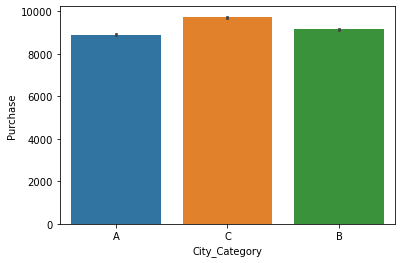

In [140]:
## Bar-plot with default statistics-mean

sns.barplot(x = 'City_Category', y = 'Purchase', data=train)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

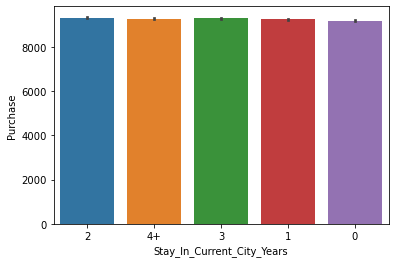

In [141]:
## Bar-plot with default statistics-mean
sns.barplot(x="Stay_In_Current_City_Years", y='Purchase', data=train)

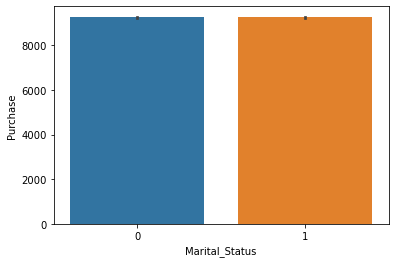

In [142]:
# bar plot with default statistic=mean
sns.barplot(x='Marital_Status', y='Purchase', data=train)
plt.show()

# amount nearly same for all groups

In [143]:
train["Product_Category_1_Count"] = train.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = train.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_2_count"] = train.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = train.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_count'] = test['Product_Category_2'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_3_count"] = train.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = train.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_count'] = test['Product_Category_3'].apply(lambda x:pc1_count_dict.get(x,0))

train["User_ID_Count"] = train.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = train.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

train["Product_ID_Count"] = train.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = train.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

In [144]:
train["User_ID_MinPrice"] = train.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = train.groupby(['User_ID'])['Purchase'].min().to_dict()
test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

train["User_ID_MaxPrice"] = train.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = train.groupby(['User_ID'])['Purchase'].max().to_dict()
test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

train["User_ID_MeanPrice"] = train.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = train.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


train["Product_ID_MinPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = train.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

train["Product_ID_MaxPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = train.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

train["Product_ID_MeanPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))

In [145]:
userID_25p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['User_ID_25PercPrice'] = train['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['User_ID_25PercPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['User_ID_75PercPrice'] = train['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_ID_25PercPrice'] = train['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_ID_75PercPrice'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))

In [146]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [147]:
round((train.isnull().sum()/len(train.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
Product_Category_1_Count       0.00
Product_Category_2_count      31.57
Product_Category_3_count      69.67
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [148]:
round((test.isnull().sum()/len(test.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
Product_Category_1_Count       0.00
Product_Category_2_count       0.00
Product_Category_3_count       0.00
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Age']=le.fit_transform(train['Age'])
test['Age']=le.fit_transform(test['Age'])

train['City_Category']=le.fit_transform(train['City_Category'])
test['City_Category']=le.fit_transform(test['City_Category'])

train['Stay_In_Current_City_Years']=le.fit_transform(train['Stay_In_Current_City_Years'])
test['Stay_In_Current_City_Years']=le.fit_transform(test['Stay_In_Current_City_Years'])

# train['Gender']=train['Gender'].map({'M':1, 'F':0})
# test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [150]:
pd.set_option('display.max_columns', 100)
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,F,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.50,12305.5,10804.00,13475.50
1,1000001,P00248942,F,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.50,12305.5,15312.00,19264.00
2,1000001,P00087842,F,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.50,12305.5,1043.75,1423.75
3,1000001,P00085442,F,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.50,12305.5,1378.00,1736.00
4,1000002,P00285442,M,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.00,11973.0,6174.50,8082.50
5,1000003,P00193542,M,2,15,0,3,0,1,2.0,NaN,15227,140378,49217.0,NaN,29,615,3646,19631,11780.517241,3828,19698,14318.772358,6953.00,15592.0,11722.50,15821.00
6,1000004,P00184942,M,4,7,1,2,1,1,8.0,17.0,19215,140378,64088.0,16702.0,14,1440,481,19693,14747.714286,3809,19707,16899.227083,15488.50,19087.0,15421.25,19362.00
7,1000004,P00346142,M,4,7,1,2,1,1,15.0,NaN,15854,140378,37855.0,NaN,14,593,481,19693,14747.714286,3847,19698,14169.618887,15488.50,19087.0,11730.00,15837.00
8,1000004,P0097242,M,4,7,1,2,1,1,16.0,NaN,15686,140378,43255.0,NaN,14,912,481,19693,14747.714286,3936,19708,15947.346491,15488.50,19087.0,15263.25,19178.75
9,1000005,P00274942,M,2,20,0,1,1,8,NaN,NaN,7871,113925,NaN,NaN,106,793,1938,21021,7745.292453,1940,10082,8068.920555,4551.75,8823.0,7762.00,9844.00


In [151]:
train['Gender']=train['Gender'].map({'M':1, 'F':0})
test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [152]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [153]:
## filling missing values in product categories 2 & 3 by by any constant number say 0


train['Product_Category_2']=train['Product_Category_2'].fillna(0)
test['Product_Category_2']=test['Product_Category_2'].fillna(0)

train['Product_Category_3']=train['Product_Category_3'].fillna(0)
test['Product_Category_3']=test['Product_Category_3'].fillna(0)

train["Product_Category_2_count"]=train["Product_Category_2_count"].fillna(0)
test["Product_Category_2_count"]=test["Product_Category_2_count"].fillna(0)

train["Product_Category_3_count"]=train["Product_Category_3_count"].fillna(0)
test["Product_Category_3_count"]=test["Product_Category_3_count"].fillna(0)

In [154]:
## checking the nan values again
round((train.isnull().sum()/len(train.index))*100,2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
Product_Category_1_Count      0.0
Product_Category_2_count      0.0
Product_Category_3_count      0.0
User_ID_Count                 0.0
Product_ID_Count              0.0
User_ID_MinPrice              0.0
User_ID_MaxPrice              0.0
User_ID_MeanPrice             0.0
Product_ID_MinPrice           0.0
Product_ID_MaxPrice           0.0
Product_ID_MeanPrice          0.0
User_ID_25PercPrice           0.0
User_ID_75PercPrice           0.0
Product_ID_25PercPrice        0.0
Product_ID_75PercPrice        0.0
dtype: float64

In [155]:
train=train.drop(['User_ID','Product_ID'],axis=1)
test=test.drop(['User_ID','Product_ID'],axis=1)

In [156]:
q1 = train['Purchase'].quantile(0.25)
q3 = train['Purchase'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
train = train[(train['Purchase'] > fence_low) & (train['Purchase'] < fence_high)]

In [157]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_count,Product_Category_3_count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,0,0,10,0,2,0,3,0.0,0.0,8370,20213,0.0,0.0,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,0,0,10,0,2,0,12,0.0,0.0,1422,3947,0.0,0.0,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,0,0,10,0,2,0,12,14.0,0.0,1057,3947,55108.0,0.0,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1,6,16,2,4,0,8,0.0,0.0,7969,113925,0.0,0.0,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [158]:
X=train.drop('Purchase',1)
y=train['Purchase']

### Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score

In [160]:
## Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [10], 'max_features': [10], 'min_samples_leaf': [100], 'min_samples_split': [200], 'n_estimators': [200]}

## Create a based model
rf = RandomForestRegressor()
# # Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [43]:
## Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.8min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [10],
                         'min_samples_leaf': [100], 'min_samples_split': [200],
                         'n_estimators': [200]},
             verbose=1)

In [44]:
##printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_params_)

0.74859958419449
{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [45]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix

In [46]:
y_test_pred=grid_search.predict(test)

In [47]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred,columns=['Purchase'])],1)
finalpred.to_csv("RF.csv",index=False)

### XGBoost

In [48]:
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor

In [49]:
params = {}
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["max_depth"] = 10
params["seed"] = 0
plst = list(params.items())
num_rounds = 1100

In [50]:
xgb=XGBRegressor()

In [51]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
y_test_pred_x=xgb.predict(test)

In [53]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_x,columns=['Purchase'])],1)
finalpred.to_csv("xgb.csv",index=False)

### Light GBM

In [54]:
import lightgbm as lgb

In [55]:
lgbm=lgb.LGBMRegressor()

In [56]:
params={'colsample_bytree': [0.7], 'learning_rate': [0.07], 'max_depth': [15], 'min_child_weight': [4],
         'n_estimators': [100], 'subsample': [0.5]}

params={'num_leaves':[200], 'objective':['regression'],'max_depth':[15],'learning_rate':[.1],'max_bin':[200]}

In [57]:
model = GridSearchCV(lgbm,
                         params,
                         cv = 3,
                         n_jobs = 5,
                         verbose=True)

In [58]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:   45.9s finished


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.1], 'max_bin': [200],
                         'max_depth': [15], 'num_leaves': [200],
                         'objective': ['regression']},
             verbose=True)

In [59]:
y_test_pred_l=model.predict(test)

In [60]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_l,columns=['Purchase'])],1)
finalpred.to_csv("lgbm.csv",index=False)

### Cat-Boost

In [61]:
import catboost as cb

In [62]:
model=cb.CatBoostRegressor()

In [63]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [15]}

model = GridSearchCV(model,
                        grid,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

In [64]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed: 30.9min finished


0:	learn: 4588.6583441	total: 1.15s	remaining: 19m 7s
1:	learn: 4283.3683239	total: 1.99s	remaining: 16m 33s
2:	learn: 4017.1240409	total: 3.04s	remaining: 16m 49s
3:	learn: 3787.1038880	total: 3.86s	remaining: 16m
4:	learn: 3589.6160636	total: 4.72s	remaining: 15m 39s
5:	learn: 3416.8443510	total: 5.5s	remaining: 15m 11s
6:	learn: 3270.1353215	total: 6.48s	remaining: 15m 19s
7:	learn: 3144.8494663	total: 7.34s	remaining: 15m 10s
8:	learn: 3038.9091171	total: 8.13s	remaining: 14m 55s
9:	learn: 2949.9834377	total: 9.06s	remaining: 14m 56s
10:	learn: 2874.8885745	total: 9.89s	remaining: 14m 49s
11:	learn: 2811.0694512	total: 10.7s	remaining: 14m 38s
12:	learn: 2758.4528520	total: 11.6s	remaining: 14m 40s
13:	learn: 2714.8743666	total: 12.4s	remaining: 14m 35s
14:	learn: 2678.1847200	total: 13.4s	remaining: 14m 42s
15:	learn: 2647.2237976	total: 14.6s	remaining: 14m 55s
16:	learn: 2620.9894700	total: 15.9s	remaining: 15m 18s
17:	learn: 2599.5555276	total: 17s	remaining: 15m 26s
18:	learn:

146:	learn: 2407.0679848	total: 2m 31s	remaining: 14m 40s
147:	learn: 2406.7781484	total: 2m 32s	remaining: 14m 38s
148:	learn: 2406.3548592	total: 2m 33s	remaining: 14m 35s
149:	learn: 2406.0214003	total: 2m 34s	remaining: 14m 33s
150:	learn: 2405.7708658	total: 2m 35s	remaining: 14m 31s
151:	learn: 2405.3864656	total: 2m 35s	remaining: 14m 29s
152:	learn: 2405.0187329	total: 2m 36s	remaining: 14m 28s
153:	learn: 2404.6093385	total: 2m 37s	remaining: 14m 27s
154:	learn: 2404.1353994	total: 2m 38s	remaining: 14m 26s
155:	learn: 2403.7560718	total: 2m 40s	remaining: 14m 26s
156:	learn: 2403.2743452	total: 2m 41s	remaining: 14m 26s
157:	learn: 2402.7763683	total: 2m 42s	remaining: 14m 25s
158:	learn: 2402.0934171	total: 2m 43s	remaining: 14m 23s
159:	learn: 2401.7447819	total: 2m 44s	remaining: 14m 21s
160:	learn: 2401.2802923	total: 2m 45s	remaining: 14m 21s
161:	learn: 2400.7718233	total: 2m 46s	remaining: 14m 20s
162:	learn: 2400.4572153	total: 2m 47s	remaining: 14m 20s
163:	learn: 24

289:	learn: 2355.5077855	total: 4m 50s	remaining: 11m 50s
290:	learn: 2355.2114646	total: 4m 51s	remaining: 11m 50s
291:	learn: 2354.9488435	total: 4m 52s	remaining: 11m 49s
292:	learn: 2354.7629959	total: 4m 53s	remaining: 11m 47s
293:	learn: 2354.4606743	total: 4m 54s	remaining: 11m 46s
294:	learn: 2354.0118998	total: 4m 55s	remaining: 11m 45s
295:	learn: 2353.4822490	total: 4m 55s	remaining: 11m 43s
296:	learn: 2353.2982828	total: 4m 56s	remaining: 11m 42s
297:	learn: 2352.9582922	total: 4m 57s	remaining: 11m 41s
298:	learn: 2352.7197868	total: 4m 58s	remaining: 11m 40s
299:	learn: 2352.3640672	total: 4m 59s	remaining: 11m 39s
300:	learn: 2351.8927354	total: 5m	remaining: 11m 38s
301:	learn: 2351.4185920	total: 5m 1s	remaining: 11m 37s
302:	learn: 2351.1849408	total: 5m 2s	remaining: 11m 36s
303:	learn: 2351.0044902	total: 5m 3s	remaining: 11m 35s
304:	learn: 2350.5719979	total: 5m 4s	remaining: 11m 34s
305:	learn: 2350.1230333	total: 5m 6s	remaining: 11m 34s
306:	learn: 2349.839511

433:	learn: 2314.2455851	total: 7m 5s	remaining: 9m 14s
434:	learn: 2313.9915246	total: 7m 6s	remaining: 9m 13s
435:	learn: 2313.4337176	total: 7m 7s	remaining: 9m 12s
436:	learn: 2313.1050160	total: 7m 8s	remaining: 9m 11s
437:	learn: 2312.9386460	total: 7m 8s	remaining: 9m 10s
438:	learn: 2312.6831395	total: 7m 10s	remaining: 9m 9s
439:	learn: 2312.5331670	total: 7m 11s	remaining: 9m 9s
440:	learn: 2312.2915478	total: 7m 14s	remaining: 9m 10s
441:	learn: 2312.0346649	total: 7m 15s	remaining: 9m 9s
442:	learn: 2311.6522669	total: 7m 17s	remaining: 9m 10s
443:	learn: 2311.4804540	total: 7m 18s	remaining: 9m 8s
444:	learn: 2311.2602777	total: 7m 19s	remaining: 9m 7s
445:	learn: 2310.9624616	total: 7m 20s	remaining: 9m 6s
446:	learn: 2310.7902256	total: 7m 21s	remaining: 9m 6s
447:	learn: 2310.5628677	total: 7m 22s	remaining: 9m 5s
448:	learn: 2310.3673841	total: 7m 23s	remaining: 9m 4s
449:	learn: 2310.1397402	total: 7m 24s	remaining: 9m 3s
450:	learn: 2309.9845904	total: 7m 25s	remaini

578:	learn: 2279.4521464	total: 9m 41s	remaining: 7m 2s
579:	learn: 2279.3128095	total: 9m 41s	remaining: 7m 1s
580:	learn: 2279.1313116	total: 9m 42s	remaining: 7m
581:	learn: 2278.9802998	total: 9m 43s	remaining: 6m 59s
582:	learn: 2278.6026484	total: 9m 44s	remaining: 6m 58s
583:	learn: 2278.3815819	total: 9m 45s	remaining: 6m 57s
584:	learn: 2278.2447818	total: 9m 46s	remaining: 6m 56s
585:	learn: 2278.0142997	total: 9m 47s	remaining: 6m 54s
586:	learn: 2277.7890516	total: 9m 48s	remaining: 6m 54s
587:	learn: 2277.6342458	total: 9m 49s	remaining: 6m 53s
588:	learn: 2277.3902822	total: 9m 51s	remaining: 6m 52s
589:	learn: 2277.2797248	total: 9m 52s	remaining: 6m 52s
590:	learn: 2277.1022816	total: 9m 54s	remaining: 6m 51s
591:	learn: 2276.9025360	total: 9m 55s	remaining: 6m 50s
592:	learn: 2276.7993530	total: 9m 56s	remaining: 6m 49s
593:	learn: 2276.4741705	total: 9m 57s	remaining: 6m 48s
594:	learn: 2276.3705868	total: 9m 58s	remaining: 6m 47s
595:	learn: 2276.1387463	total: 9m 59

721:	learn: 2249.8086202	total: 12m 16s	remaining: 4m 43s
722:	learn: 2249.6111160	total: 12m 18s	remaining: 4m 42s
723:	learn: 2249.4469493	total: 12m 19s	remaining: 4m 41s
724:	learn: 2249.1055516	total: 12m 20s	remaining: 4m 40s
725:	learn: 2248.9173781	total: 12m 21s	remaining: 4m 39s
726:	learn: 2248.8074136	total: 12m 22s	remaining: 4m 38s
727:	learn: 2248.6001393	total: 12m 23s	remaining: 4m 37s
728:	learn: 2248.3718834	total: 12m 24s	remaining: 4m 36s
729:	learn: 2248.1778555	total: 12m 26s	remaining: 4m 35s
730:	learn: 2248.0665887	total: 12m 26s	remaining: 4m 34s
731:	learn: 2247.8673352	total: 12m 27s	remaining: 4m 33s
732:	learn: 2247.6572373	total: 12m 28s	remaining: 4m 32s
733:	learn: 2247.3644102	total: 12m 29s	remaining: 4m 31s
734:	learn: 2247.1726913	total: 12m 29s	remaining: 4m 30s
735:	learn: 2247.0068345	total: 12m 30s	remaining: 4m 29s
736:	learn: 2246.7840898	total: 12m 31s	remaining: 4m 28s
737:	learn: 2246.5934351	total: 12m 33s	remaining: 4m 27s
738:	learn: 22

864:	learn: 2221.8537616	total: 14m 59s	remaining: 2m 20s
865:	learn: 2221.7069488	total: 15m	remaining: 2m 19s
866:	learn: 2221.5582877	total: 15m 1s	remaining: 2m 18s
867:	learn: 2221.4194211	total: 15m 2s	remaining: 2m 17s
868:	learn: 2221.2975569	total: 15m 3s	remaining: 2m 16s
869:	learn: 2221.1766065	total: 15m 4s	remaining: 2m 15s
870:	learn: 2221.0657047	total: 15m 5s	remaining: 2m 14s
871:	learn: 2221.0336923	total: 15m 5s	remaining: 2m 12s
872:	learn: 2220.8595592	total: 15m 6s	remaining: 2m 11s
873:	learn: 2220.6467032	total: 15m 7s	remaining: 2m 10s
874:	learn: 2220.4371726	total: 15m 8s	remaining: 2m 9s
875:	learn: 2220.2158614	total: 15m 9s	remaining: 2m 8s
876:	learn: 2220.0622197	total: 15m 11s	remaining: 2m 7s
877:	learn: 2219.8942176	total: 15m 12s	remaining: 2m 6s
878:	learn: 2219.7328671	total: 15m 13s	remaining: 2m 5s
879:	learn: 2219.5512694	total: 15m 14s	remaining: 2m 4s
880:	learn: 2219.3511204	total: 15m 16s	remaining: 2m 3s
881:	learn: 2219.0614429	total: 15m

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002228377D550>,
             n_jobs=5,
             param_grid={'depth': [10], 'l2_leaf_reg': [15],
                         'learning_rate': [0.1]},
             verbose=True)

In [65]:
y_test_predict_c=model.predict(test)

In [66]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_predict_c,columns=['Purchase'])],1)
finalpred.to_csv("catb_1.csv",index=False)

### Stacked Model

Creating 2 LightBoost Models both with different learning rates and different set of features for both of them

Light Boost model 1 (learning rate = 0.5), and features set = alist + blist (mentioned below)

Light Boost model 2 (learinng rate = 0.8), and features set = alist + clist** (mentioned below)

In [164]:
alist = ['Gender',
'Age',
'Occupation',
'City_Category',
'Stay_In_Current_City_Years',
'Marital_Status',
'Product_Category_1',
'Product_Category_2',
'Product_Category_3',
'User_ID_Count',
'Product_ID_Count']
         
blist = ['User_ID_MinPrice',
'User_ID_MaxPrice',
'User_ID_MeanPrice',
'Product_ID_MinPrice',
'Product_ID_MaxPrice',
'Product_ID_MeanPrice']

clist = ['User_ID_25PercPrice',
'User_ID_75PercPrice',
'Product_ID_25PercPrice',
'Product_ID_75PercPrice',
'Product_Category_1_Count',
'Product_Category_2_count',
'Product_Category_3_count',]

In [165]:
#XGB model 1 dataframe
train1 = train[alist+blist]
test1 = test[alist+blist]

#XGB model 2 dataframe 
train2 = train[alist+clist]
test2 = test[alist+clist]

In [173]:
# train1_x=train1.drop(['Purchase'],axis=1)
# train_1_y=train1['Purchase']

In [167]:
mod_1=lgb.LGBMRegressor(learning_rate=[.2],importance_type='gain')
mod_2=lgb.LGBMRegressor(learning_rate=[.4],importance_type='gain')

In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(train1,y,test_size=0.3,random_state=101)

In [169]:
mod_1.fit(X_train,Y_train)

LGBMRegressor(importance_type='gain', learning_rate=[0.2])

In [170]:
y_test=mod_1.predict(X_test)

In [171]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2460.6276578748552


In [174]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_1.feature_importances_})

keys = list(X_train.columns)
values = list(mod_1.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,Product_ID_MeanPrice,94.010000
1,User_ID_MeanPrice,3.600000
2,User_ID_Count,0.520000
3,User_ID_MaxPrice,0.490000
4,Product_ID_MaxPrice,0.310000
5,User_ID_MinPrice,0.240000
6,Product_ID_MinPrice,0.140000
7,Product_ID_Count,0.120000
8,Gender,0.110000
9,Age,0.100000


Text(0, 0.5, 'Features')

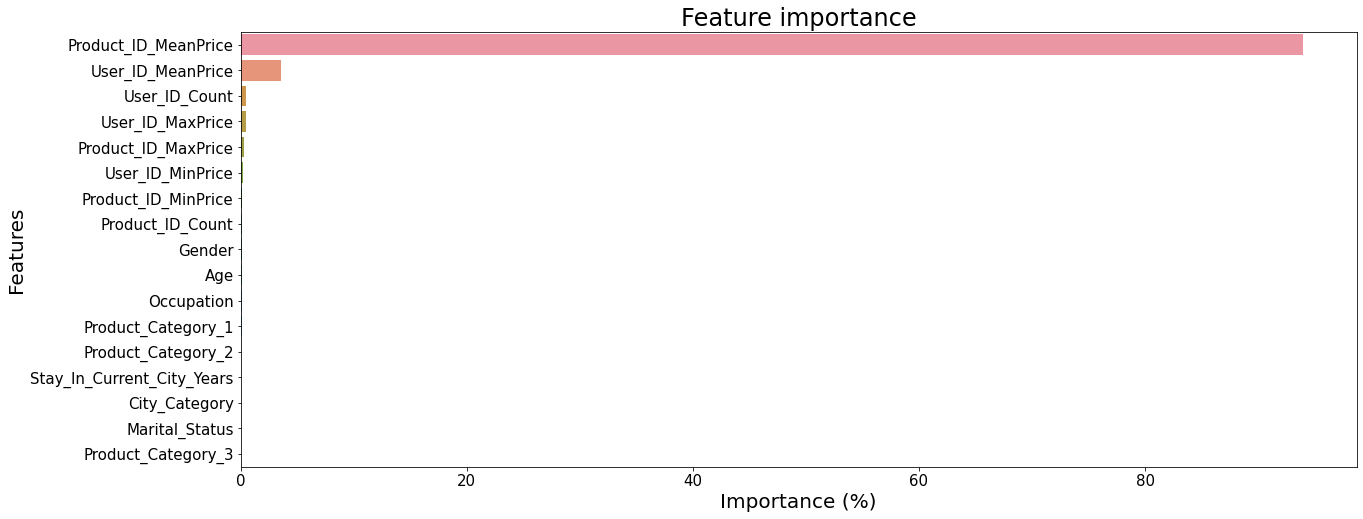

In [175]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [176]:
#prediction1
pred_lgbm_m1 = mod_1.predict(test1)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m1,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod1.csv',index=False)

In [177]:
X_train,X_test,Y_train,Y_test = train_test_split(train2,y,test_size=0.3,random_state=101)

In [178]:
mod_2.fit(X_train,Y_train)

LGBMRegressor(importance_type='gain', learning_rate=[0.4])

In [179]:
y_test=mod_2.predict(X_test)

In [180]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2465.545887916646


In [181]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_2.feature_importances_})

keys = list(X_train.columns)
values = list(mod_2.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})


,Features,Importance (%)
0,Product_ID_75PercPrice,79.310000
1,Product_ID_25PercPrice,14.020000
2,User_ID_75PercPrice,2.440000
3,User_ID_25PercPrice,2.290000
4,User_ID_Count,0.620000
5,Product_ID_Count,0.240000
6,Occupation,0.200000
7,Product_Category_1,0.180000
8,Age,0.150000
9,Gender,0.090000


Text(0, 0.5, 'Features')

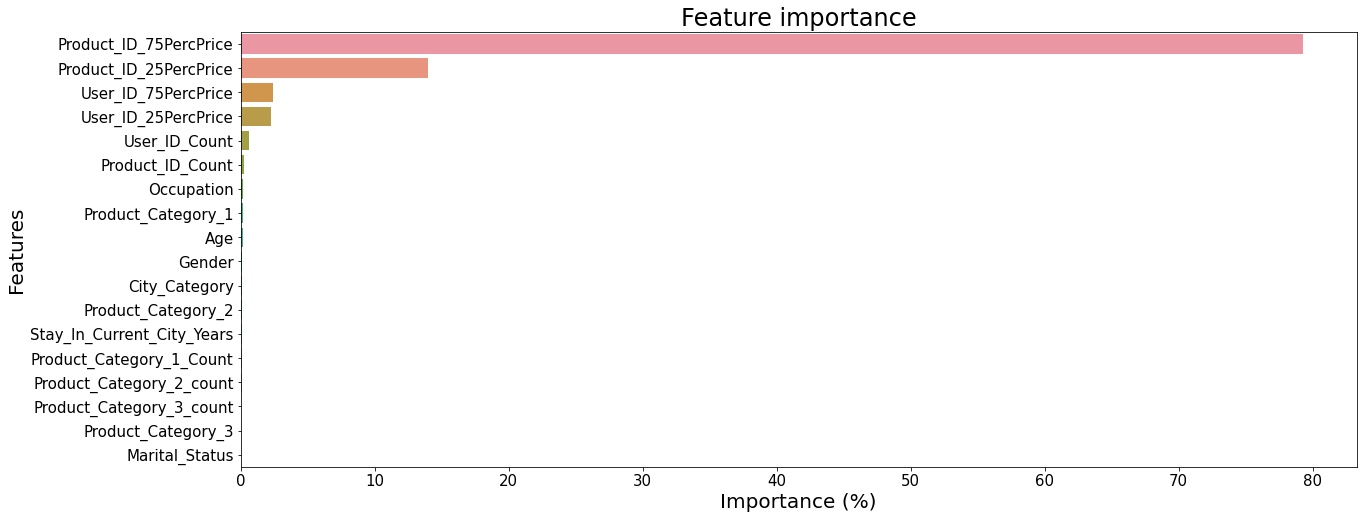

In [182]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [183]:
#prediction2
pred_lgbm_m2 = mod_2.predict(test2)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m2,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod2.csv',index=False)

In [184]:
## Weighted average of above two models
sub['Purchase'] = 0.5*pred_lgbm_m1 + 0.5*pred_lgbm_m2
sub.to_csv('final.csv',index=False)

In [185]:
### CATBoost is the final model, as it has performed better than the stacked model